reference : https://github.com/Joseph94m/MCMC/blob/master/MCMC.ipynb

이름부터 어려운 마코프 채인 몬테 카를로... 도대체 뭘까 대체 넌 뭐냐.. ?

이제 일반적으로 machine learning 문제를 formulating하는 방법은 크게 두가지로 나뉜다.

1. frequentist approach
2. Bayesian approach

### Frequentist approach

일반적으로 현대에 들어서 Deep Learning은 frequentist approach를 따른다고 볼 수 있다. 먼저 모델 파라미터 $\theta$에 대한 loss function $\mathcal{L}_f(\theta;=\mathcal{D})$에 대해 정의하고, 관측된 데이터셋 $\mathcal{D}=\{(x_i,y_i)\}^N_{i=1}$에 대해 모델 $\hat{y}_i(\theta)=f(x_i;\theta)$가 observed label $y_i$에 가까워질 수 있도록 예측하게 만든다. 예를 들어 $x_i$가 feature이고 $y_i$가 데이터 포인트 $d_i\in\mathcal{D}$의 $i^\text{th}$번째 label인 경우, Mean Squared error(MSE) function ${1\over{N}}\sum^N_{i=1}(y_i-\hat{y}_i(\theta))^2$가 regression problem에서 사용되는 loss function이 될 수 있다.

그러고 나면, 우리는 loss function을 최소화 하는 가장 최적의 optimal solution인 parameter $\theta^*$을 찾는 것을 목적으로 optimization algorithm을 실행한다. 그냥 단순히 loss function을 minimization하는 건 overfitting이 있을 수 있으니, additional term으로 $\Omega(\theta)$를 복잡한 모델이 추가되는걸 방지하기 위해 사용한다. 결과적으로 optimization problem은 다음의 form으로 나타낼 수 있다.

$$\theta^*=\arg\min_\theta \mathcal{L}_f(\theta;\mathcal{D})+\lambda\Omega(\theta)$$

여기서 $\lambda$는 정규화 하이퍼 파라미터이다.

## Bayesian approach

이러한 frequentis approach와는 다르게, *Bayesian* approach는 관측된 데이터 $\mathcal{D}$가 주어졌을 때 모델 파라미터 $\theta$*distribution*을 얻는데 초점이 잡혀있다. 이러한 parameter의 분포를 *posterior distribution* $p(\theta|\mathcal{D})$라고 하고, Bayes'rule에 따라 다음과 같이 얻을 수 있다.

$$p(\theta|\mathcal{D})={p(\mathcal{D}|\theta)p(\theta)\over{p(\mathcal{D})}}$$

여기서 $p(\mathcal{D|\theta})=\prod^N_{i=1}p(d_i|\theta)$이며, $\theta$를 통해 parameterized된 데이터 $\mathcal{D}$의 likelihood function이고 $p(\theta)$는 사전확률분포(prior distribution)로 우리의 prior knowledge를 parameter $\theta$에 넣어주는 역할을 한다. 분모는 evidence혹은 marginal likelihood라고 불리며 $p(\mathcal{D})=\int p(\mathcal{D}|\theta)p(\theta)d\theta$를 통해 얻을 수 있다. 

테스트 단계에서는, 예측은 $p(y^\prime|\theta,x^\prime)$을 posterior distribution $p(\theta|\mathcal{D})$에 대하여 intergrating함으로써 얻어진다. 결과적으로 아래와 같은 posterior predictive distribution을 얻는다.

$$p(y^\prime|\mathcal{D})=\int p(y^\prime|\theta, x^\prime)p(\theta|\mathcal{D})d\theta$$

Bayesian inference는 종종 frequentist 방법보다 더 많은 계산을 필요로 한다. 왜냐면 posterior distribution을 구할 때 marginal likelihood $p(\mathcal{D})$를 구하는 과정이 꽤나 어렵기 때문이다.

### Bayesian inference란 ?

베이즈 추론(Bayesian Inference)는 **통계적 추론**의 한 방법으로, 추론 대상의 **사전확률**과 추가적인 정보를 이용해 해당 대상의 **사후 확률을 추론**하는 방법이다.

이는 식으로 다음과 같이 표현할 수 있다. : $\displaystyle{P(A|B)={P(B|A)P(A)\over{P(B)}}}$

- $P(A|B)$는 우리가 구하고자 하는 최종 답이며, 사후 분포라고 부른다.
- $P(B|A)$는 가능도이다.
- $P(A)$는 사전확률이다.
- $P(B)$는 evidence라고 불린다.

우리는 대부분의 경우 $\displaystyle{P(\theta|D)={P(D|\theta)P(\theta)\over{P(D)}}}$에 관심이 있고, 이것들은 where, $P(\theta|D)$는 사후분포, $P(D|\theta)$는 가능도, $P(\theta)$는 사전확률, $P(D)$는 evidence 이다.

이 말은, 우리는 모델을 설명하는 데이터 $D$가 주어졌을 때, 가장 가능성 있는 distribution $\theta$를 찾고 싶다는 의미이다. 그런데 **$P(D)$를 구하는 경우가 문제**가 된다. **정확한 데이터 분포에 대한 정보를 안다는 것은 사실상 불가능**하기 때문인데, 이는 계산으로 풀어내기가 매우 어렵다. 따라서 이 때, **MCMC는 사후확률로부터 샘플링을 가능하도록 하고 파라미터에 대한 분포를 추출**하는 과정을 통해 문제를 해결할 수 있다.

### Markov Chain Monte Carlo

한마디로, MCMC는 우리가 **직접적으로 샘플링할 수 없는 어떤 분포**로부터 **샘플링을 할 수 있도록 만들어 주는 방법**이다. 이 방법은 몇몇 데이터셋과 사전 지식이 주어졌을 때, 파라미터에 대한 분포를 계산할 수 있다.

### Metropolis-Hastings

MCMC의 한 방법이다. Metropolis-Hastings는 MCMC의 특정 방법으로, Gibbs sampling과 rejection sampling과는 다르게 고차원 공간에서 잘 작동한다.

이러한 테크닉은 proposal distribution $Q(\theta^\prime|\theta)$(Which is called transition model)이라고 불리는 간단한 분포를 필요로 하는데, 이 분포는 우리가 다루기 힘든 사후분포 $P(\theta|D)$로부터 샘플을 추출하는 것을 도와준다.

Metropolis-Hastings는 **분포 공간에서의 무작위 걸음(randomly walk)을 위해 $Q$를 사용**한다. 이는 샘플의 가능성에 기반하여 새로운 위치로 움직이는 것을 수용하거나 거절하는 분포이다. 이러한 "memoriless" random wolk가 "Markov Chain" part of MCMC이다.

각각의 새로운 샘플에 대한 가능도는 function $f$로부터 결정된다. 왜냐면 $f$는 항상 우리가 샘플링하기 원하는 사후확률의 proportional이기 때문이다. $f$는 일반적으로 이러한 proportional을 표현하는 확률 밀도 함수로 선택된다.

파라미터의 새로운 위치를 얻어내기 위해서, 현재의 $\theta$를 취하고 새로운 $\theta^\prime$을 제시하는 것은, $Q(\theta^\prime|\theta)$로 부터 랜덤한 샘플을 뽑는 것과 동일하다. 종종 이것은 symmetric distribution이다. 예를들어, 평균 $\theta$와 표준편차 $\sigma$를 갖는 정규분포이다. : $Q(\theta^\prime|\theta)=\mathcal{N}(\theta,\sigma)$

$\theta^\prime$을 accept할거냐 reject할거냐를 결정하기 위해서, 각 새로운 값 $\theta^\prime$에서 다음의 ratio는 무조건 계산되어야 한다 : $\displaystyle{{P(\theta^\prime|D)\over{P(\theta|D)}}}$. Bayes' formula를 사용하면 이 식이 다음과 같이 변화한다 : $\displaystyle{{P(D|\theta^\prime)P(\theta^\prime)\over{P(D|\theta)P(\theta)}}}$ (The evidence $P(D)$ is simply crossed out during the division). $\displaystyle{{P(D|\theta^\prime)P(\theta^\prime)\over{P(D|\theta)P(\theta)}}}$는 또 다음과 같이 나타낼 수 있다 $\displaystyle{{\prod^n_i f(d_i|\theta^\prime)P(\theta^\prime)\over{\prod^n_i f(d_i|\theta)P(\theta)}}}$

$$\displaystyle{P(\text{accept})=\begin{cases}{\displaystyle{\prod^n_i f(d_i|\theta^\prime)P(\theta^\prime)\over{\prod^n_i f(d_i|\theta)P(\theta)}}}, \prod^n_i f(d_i|\theta)P(\theta)> \prod^n_i f(d_i|\theta^\prime)P(\theta^\prime)\\ 1, \prod^n_i f(d_i|\theta)P(\theta)\leq \prod^n_i f(d_i|\theta^\prime)P(\theta^\prime)\end{cases}}$$

이것은 만약 $\theta^\prime$이 현재 $\theta$보다 더 가능성이 높을 때, 우리는 $\theta^\prime$을 채택한다는 의미이다. 만약, 현재 $\theta$ 보다 낮다면, 우리는 채택할지, 말지 랜덤하게 더 낮은 확률을 이용해 결정한다.

### Metropolis-Hastings Algorithm:

- given :
    - $f$, the PDF of the distribution to sample from
    - $Q$, the transition model
    - $\theta_0$, a first guess for $\theta$
    - $\theta$ = $\theta_0$
- for $n$ iterations
    - $p=f(D|\theta)P(\theta)$
    - $\theta^\prime=Q(\theta_i)$
    - $p^\prime=f(D|\theta^\prime)P(\theta^\prime)$
    - $ratio = {p^\prime\over{p}}$
    - generate a uniform random number $r$ in [0,1]
    - if $r < ratio$:
        - set $\theta_i=\theta^\prime$

## Dummy data example
### Step 1 : Data generation

그럼 데이터를 만들어보자.

먼저 $\mu=10$, $\sigma=3$인 normal distribution으로 부터 30,000개의 샘플을 추출해보도록 하자.

(우리는 이중에서 1,000개만 볼 수 있다)

9.989355151691763

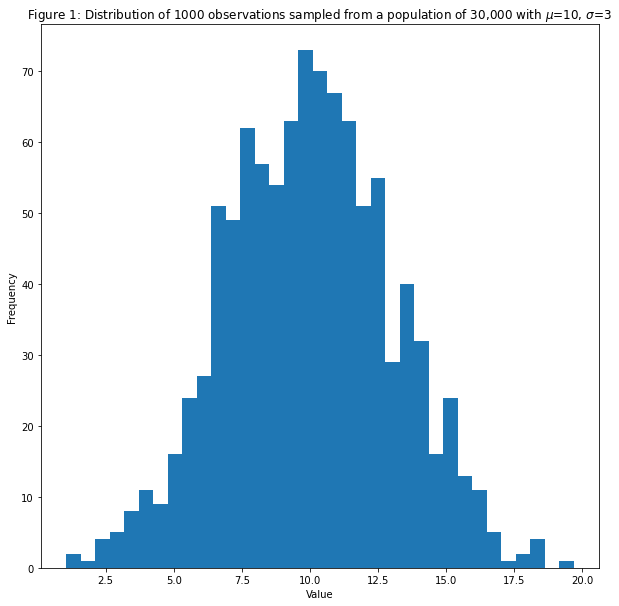

In [2]:
import numpy as np
import scipy
import scipy.stats
import matplotlib as mpl   
import matplotlib.pyplot as plt
%matplotlib inline

mod1 = lambda t : np.random.normal(10, 3, t)

# 30,000개의 샘플을 추출할 것이다.
population = mod1(30000)
# 우리는 근데, 이 샘플들 중에서 1,000개만 볼 수 있다고 가정해보자
observation = population[np.random.randint(0, 30000, 1000)]

# figure size
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(observation, bins=35,)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Figure 1: Distribution of 1000 observations sampled from a population of 30,000 with $\mu$=10, $\sigma$=3")
mu_obs=observation.mean()
mu_obs

### Step 2 : What do we want ?

우리는 1000개의 observed sample을 사용해서 $\sigma_{obs}$에 대한 distribution을 찾고 싶다. 근데 보니까 그냥 계산하면 될 것 같다 ? $\sigma=\sqrt{{1\over{n}}\sum^n_i(d_i-\mu)^2}$. 이렇게 그냥 계산하면 되는데 왜 굳이 샘플링을 할까? 왜냐면 실제 데이터에서 이런 공식을 통해 직접적으로 분포에 대한 정보를 구하는 것은 불가능 하기 때문이다. 덧붙여서, 우리가 관심 있는 것은 $\sigma$값이 아니라, 가능한 $\sigma$값에 대한 분포를 계산하고 싶은 것이다.

### Step 3 : Define the PDF and the transition model.

위 그림 1에서, 데이터가 정규분포라는 것을 볼 수 있다. 평균은 쉽게 1000개 샘플에 대한 평균을 냈기에 $\mu_{obs}=9.98$이라는 걸 알 수 있다.

**transition model/ proposal distribution에 대해 생각해보자.**

우리는 지금까지 어떤 분포를 transition model로 사용할 지, 구체적인 분포를 생각하지 않았다. 따라서 그냥 아주 간단한 정규분포를 생각해보자 !

$$Q(\sigma_{new}|\sigma_{current})=N(\mu=\sigma_{current},\sigma^\prime=1)$$

여기서 $\sigma^\prime$은 $\sigma_{new}$나 $\sigma_{current}$와 관련이 없다. 이건 단순하게 파라미터 공간의 표준편차를 나타낸 것이다. 그래서 아무값이나 사용해도 된다. 왜냐면 이건 그냥 수렴하는 시간에만 관련이 있기 때문이다.

**PDF에 대해 생각해보자**

$f$가 사후확률의 비례가 되기 위해서는, 우리는 $f$가 데이터 $D$ 에서의 각각의 데이터 포인트 $d_i$에 대하여 Probability Density Function(PDF)를 따르도록 선택해야 한다, 

$$f(d_i|\mu,\sigma^2)={1\over{\sqrt{2\pi\sigma^2}}}e^{-{(d_i-\mu)^2\over{2\sigma^2}}}$$

In our case, $\theta$ is made up of two values: [$\mu,\sigma$] and that $\mu$ is a constant, $\mu=\mu_{obs}$

### Step 4 : Define when we accept or reject $\sigma_{new}$.

우리는 만약에

$$\displaystyle{{Likelihood(D|\mu_{obs},\sigma_{new})*prior(\mu_{obs},\sigma_{new})\over{Likelihood(D|\mu_{obs},\sigma_{current})*prior(\mu_{obs},\sigma_{current}}}}>1$$

라면 $\sigma_{new}$를 accept할거다.

만약에 이 비율이 1보다 작거나 같다면, 우리는 바로 reject하지 않고, uniformly generated random number을 통해 비교할 것이다. 만약 그 비율이 이러한 random number보다 크다면 우리는 $\sigma_{new}$를 accept할 것이고, 작은경우 완전히 reject할 것이다.

Note: Since we will be computing this ratio to decide which parameters should be accepted, it is imperative to make sure that the adopted function $f$ is proportional to the posterior itself, $P(\sigma|D,\mu)$, which in that case is verified. ($f$ is the PDF of $P$)

### Step 5 : Define the prior and the likelihood:

**우리가 $\mu$가 고정되어 있을 때, $P(\sigma)$로 대체할 수 있는 사전확률 $P(\theta)$의 경우**

우리는 $\sigma_{new}$나 $\sigma_{current}$ 값들 중 어떤 값을 취하더라도 선호되는 것이 없다. 주목할 것은, 오직 그것들이 positive냐 인 것이다. 왜냐 ? 직관적으로 표준편차는 분산을 측정한다. 분산은 거리이며, 거리는 음수가 될 수 없다. 수학적으로 $\sigma=\sqrt{{1\over{n}}\sum^n_i(d_i-\mu)^2}$ 이며, 루트의 결과는 음수가 될 수 있다. 우리는 사전확률에서 이것을 강제할 수 있다.

**likelihood의 경우**

관찰된 데이터셋 $D$에 대한 전체 가능도는 $Likelihood(D|\mu_{obs},\sigma_a)=\prod^n_i f(d_i|\mu_{obs},\sigma_a)$이며, $a=new\: or\: current$이다.

우리의 경우 log를 적용할 것이다. 왜냐면 이렇게 하면 곱셈이 덧셈이되면서 훨씬 간단해지기 때문.

그래서 아까 Step 4에 있는 식에 로그를 씌우면

$\log(Likelihood(D|\mu_{obs},\sigma_{new}))+\log(prior(\mu_{obs},\sigma_{new}))-(\log(Likelihood(D|\mu_{obs},\sigma_{current}))+\log(prior(\mu_{obs},\sigma_{current})))>0$

이는,

$\sum^n_i \log(f(d_i|\mu_{obs},\sigma_{new}))+\log(prior(\mu_{obs},\sigma_{new}))> \sum^n_i \log(f(d_i|\mu_{obs},\sigma_{current}))+\log(prior(\mu_{obs},\sigma_{current}))$ 

이는,

$\sum^n_i-n\log(\sigma_{new}\sqrt{2\pi})-{(d_i-\mu_{obs})^2\over{2\sigma^2_{new}}}+\log(prior(\mu_{obs},\sigma_{new}))> \sum^n_i-n\log(\sigma_{current}\sqrt{2\pi})-{(d_i-\mu_{obs})^2\over{2\sigma^2_{current}}}+\log(prior(\mu_{obs},\sigma_{current}))$

In [37]:
# transition model을 정의해보자. 
# transition model은 sigma_current에서 sigma_new로 어떻게 움직일 것인지 정하는 것이다.

# 아까 우리는 transision function을 normali distribution으로 정의했다.
# 그리고, 평균이 현재 표준편차, 표준편차는 1로 두었다. -> 이때, 표준편차는 아무거나 상관 없다.
# 수렴속도만을 결정하기 때문.
transition_model = lambda x : [x[0], np.random.normal(x[1], 0.5, (1,))[0]]

def prior(x):
    # x[0]은 평균, x[1]은 sigma이다. (new or current)
    # 모든 유효한 시그마값들은 1로 return받는다. -> Log(1) = 0이기 때문에, 덧셈에 영향주지 않는다.
    # 모든 유효하지 않은 시그마값(<=0)들은 0으로 return 받는다 -> Log(0)=-inf 이기에 정의되지 않는다.
    # 이것은, sigma가 무한대가 되는 것을 막아준다.
    if (x[1] <= 0):
        return 0
    return 1

# 시그마가 주어졌을 때, 데이터에 대한 가능도를 계산한다.

def manual_log_like_normal(x, data):
    # x[0] = mu, x[1] = sigma (new or current)
    # data = the observation
    return np.sum(-np.log(x[1] * np.sqrt(2 * np.pi))-((data-x[0])**2) / (2*x[1]**2))

# manual_log_like_normal(x, data)와 같다. 근데, scipy implementation을 사용한다. -> 좀 더 느림
def log_lik_normal(x, data):
    # x[0] = mu, x[1] = sigma (new or current)
    # data = the observation
    return np.sum(np.log(scipy.stats.norm(x[0],x[1]).pdf(data)))

# accept혹은 reject를 언제 할건지 정해줘야됨
def acceptance(x, x_new):
    if x_new > x:
        return True
    else:
        accept = np.random.uniform(0,1)
        # 우리가 log likelihood를 사용하기 떄문에, exp를 사용해줘야함
        # 적은 x_new일수록 accept될 확률이 적은
        return (accept < np.exp(x_new-x))
    
def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    x = param_init # [mu_obs=9.98, 0.1]
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x) # Q(x_new,x) !  -> [mu_obs=9.98, np.random.normal(sigma_current=0.1, 0.5, (1,))[0]]
        x_lik = likelihood_computer(x,data) # observed data에 대해 x의 likelihood를 구해주기, data= observation
        x_new_lik = likelihood_computer(x_new,data)  
        if (acceptance_rule(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)


### Step 6 : Run the algorithm with initial parameters and collect accepted and rejected samples

In [58]:
accepted, rejected = metropolis_hastings(manual_log_like_normal,prior,transition_model,[mu_obs,0.1], 50000,observation,acceptance)

/tmp/ipykernel_2243348/3192958961.py:23: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(x[1] * np.sqrt(2 * np.pi))-((data-x[0])**2) / (2*x[1]**2))
/tmp/ipykernel_2243348/3192958961.py:55: RuntimeWarning: divide by zero encountered in log
  if (acceptance_rule(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):


In [59]:
print(accepted.shape)

(8469, 2)


In [60]:
accepted[-10:,1]

array([3.11839404, 3.02653073, 3.01547618, 3.07311442, 3.05205634,
       2.95043783, 3.12619934, 2.9565844 , 2.9260509 , 3.12506405])

(8469, 2)

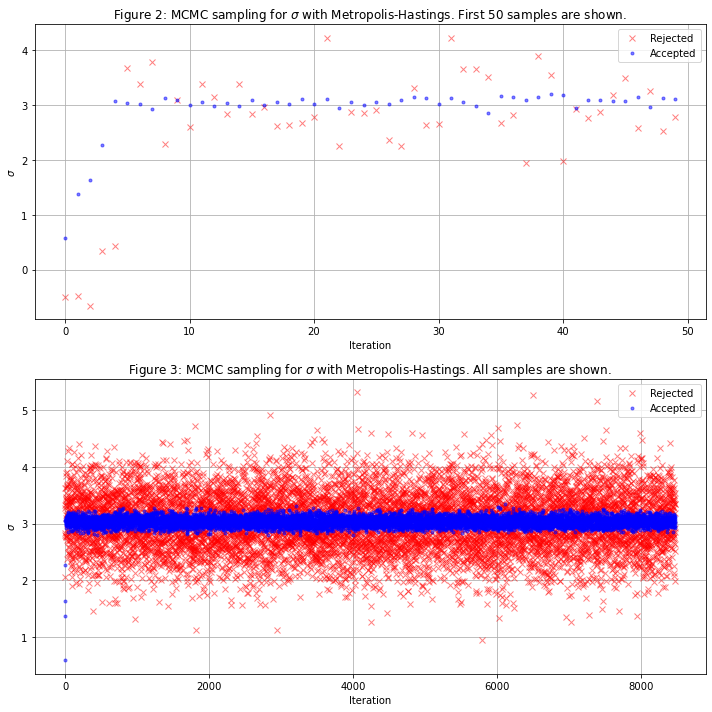

In [61]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejected[0:50,1], 'rx', label='Rejected',alpha=0.5)
ax.plot( accepted[0:50,1], 'b.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("$\sigma$")
ax.set_title("Figure 2: MCMC sampling for $\sigma$ with Metropolis-Hastings. First 50 samples are shown.")
ax.grid()
ax.legend()



ax2 = fig.add_subplot(2,1,2)
to_show=-accepted.shape[0]
ax2.plot( rejected[to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax2.plot( accepted[to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("$\sigma$")
ax2.set_title("Figure 3: MCMC sampling for $\sigma$ with Metropolis-Hastings. All samples are shown.")
ax2.grid()
ax2.legend()



fig.tight_layout()
accepted.shape

알고리즘을 다시한번 설명하면 다음과 같다.

1. 가장 먼저, 관측된 데이터에서의 평균을 구한다. 
2. 그러고나서, Q(transition model)를 normal distribution이라고 했을 때, 미리 정해둔 $\sigma_{current}$를 평균으로하고  $\sigma^\prime$을 분산으로 하는(맘대로 설정해도 됨, 어차피 수렴 속도에만 관계가 있음) Q를 만들어낸다.
3. 가능도를 구한다.